<a href="https://colab.research.google.com/github/9characters/RL_repo/blob/master/Intro_to_Q_learning_and_DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys

# Checks that the Runtime is correct
if 'google.colab' in sys.modules:
    !nvidia-smi | grep -q 'failed' && echo "STOP! You are using a runtime without a GPU. Change the runtime type before going further!"

In [0]:
import sys

# Setup for use in Colab
if 'google.colab' in sys.modules:
    # Clone GitHub repository
    !git clone https://github.com/AIcrowd/droneRL-workshop
        
    # Install packages via pip
    !pip install -r "droneRL-workshop/colab-requirements.txt"
    
    # Restart Runtime so everything takes effect
    import os
    os.kill(os.getpid(), 9)

    # Your Runtime will crash after this - this is normal!
    # Resume from next cell after it restarted

Cloning into 'droneRL-workshop'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 648 (delta 49), reused 61 (delta 19), pack-reused 543
Receiving objects: 100% (648/648), 15.03 MiB | 29.49 MiB/s, done.
Resolving deltas: 100% (375/375), done.
     |████████████████████████████████| 1.6MB 3.5MB/s 
     |████████████████████████████████| 2.1MB 23.6MB/s 
     |████████████████████████████████| 225kB 21.2MB/s 
     |████████████████████████████████| 13.1MB 248kB/s 
     |████████████████████████████████| 10.4MB 53.4MB/s 
     |████████████████████████████████| 20.0MB 98kB/s 
     |████████████████████████████████| 753.4MB 16kB/s 
     |████████████████████████████████| 4.0MB 53.6MB/s 
     |████████████████████████████████| 1.0MB 51.6MB/s 
  Created wheel for gym: filename=gym-0.15.4-cp36-none-any.whl size=1648483 sha256=31d9243aa3d249c5f26172d472ad052388be3d9d1cbacf2d4166ada807bd2b07
  S

In [1]:
%cd droneRL-workshop

/content/droneRL-workshop


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
import os

Intro to Q-Learning (compass Q-table)
---

You can find a Q-learning implementation in `agents/`

```
agents/
├── curiosity.py
├── dqn.py
├── logging.py
├── qlearning.py    <-- Q-learning agent
└── random.py
```

Observation space: Discrete(8)
Initial state: {0: '↙', 2: '↑', 1: '↘'}


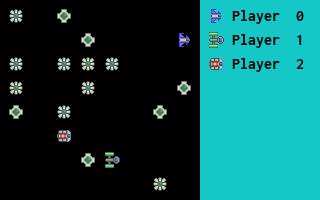

In [3]:
from env.env import DeliveryDrones
from env.wrappers import CompassQTable, CompassChargeQTable, LidarCompassQTable, LidarCompassChargeQTable

# Environment without Skyscrapers + discharge
env = CompassQTable(DeliveryDrones())
env.env_params.update({'n_drones': 3, 'skyscrapers_factor': 0, 'stations_factor': 0,  'discharge': 0})
states = env.reset()

print('Observation space:', env.observation_space)
print('Initial state:', {drone_index: env.format_state(state) for drone_index, state in states.items()})
Image.fromarray(env.render(mode='rgb_array'))

In [4]:
from agents.random import RandomAgent
from agents.qlearning import QLearningAgent

# Create random agents
agents = {drone.index: RandomAgent(env) for drone in env.drones}

# Create one Q-learning agent
agents[0] = QLearningAgent(
    env,
    gamma=0.95, # Discount factor
    alpha=0.1, # Learning rate
    # Exploration rate
    epsilon_start=1, epsilon_decay=0.99, epsilon_end=0.01
)

agents

{0: <agents.qlearning.QLearningAgent at 0x7fdbda133a20>,
 1: <agents.random.RandomAgent at 0x7fdbdaa17dd8>,
 2: <agents.random.RandomAgent at 0x7fdbdaa17d30>}

In [5]:
from helpers.rl_helpers import MultiAgentTrainer, plot_rolling_rewards, test_agents, plot_cumulative_rewards

# Train agents
trainer = MultiAgentTrainer(env, agents, reset_agents=True, seed=0)
trainer.train(5000)

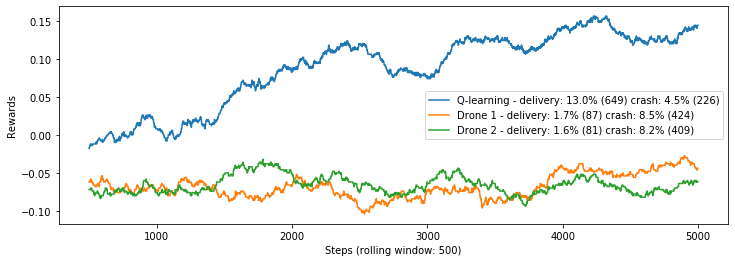

In [6]:
plot_rolling_rewards(trainer.rewards_log, drones_labels={0: 'Q-learning'})

In [7]:
from env.env import DeliveryDrones

agents[0].get_qtable()

,←,↓,→,↑,X
→,1.7,1.4,2.6,0.86,1.5
↘,1.3,1.6,2.4,0.78,1.5
↑,1.9,1.6,1.4,2.5,1.7
↗,1.4,0.58,1.8,1.6,1.6
↖,2.2,1.3,0.97,1.6,1.5
↙,2.5,2,1.3,0.9,1.5
↓,1.8,2.9,1.7,1.2,2.1
←,2.6,1.5,2.1,1.2,2.2


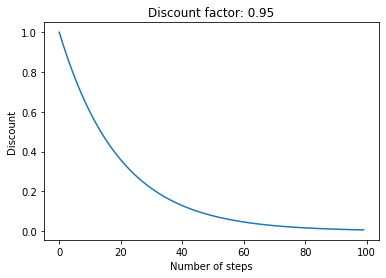

In [8]:
plt.plot(agents[0].gamma**np.arange(100))
plt.title('Discount factor: {}'.format(agents[0].gamma))
plt.xlabel('Number of steps')
plt.ylabel('Discount')
plt.show()

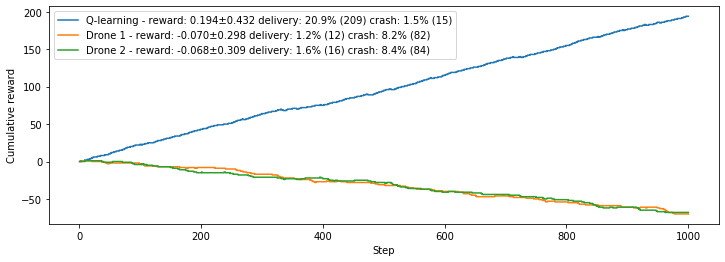

In [9]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=0)
plot_cumulative_rewards(rewards_log, drones_labels={0: 'Q-learning'})

In [10]:
from helpers.rl_helpers import render_video, ColabVideo

path = os.path.join('output', 'videos', 'ql-compass.mp4')
render_video(env, agents, video_path=path, n_steps=120, fps=1, seed=0)
ColabVideo(path)

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)958464/45929032 bytes (2.1%)2695168/45929032 bytes (5.9%)5406720/45929032 bytes (11.8%)9347072/45929032 bytes (20.4%)13500416/45929032 bytes (29.4%)17801216/45929032 bytes (38.8%)22052864/45929032 bytes (48.0%)26394624/45929032 bytes (57.5%)30793728/45929032 bytes (67.0%)35045376/45929032 bytes (76.3%)39043072/45929032 bytes (85.0%)43147264/45929032 bytes (93.9%)45929


[MoviePy] >>>> Building video output/videos/ql-compass.mp4
[MoviePy] Writing video output/videos/ql-compass.mp4


100%|█████████▉| 2880/2881 [00:05<00:00, 512.22it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: output/videos/ql-compass.mp4 



Scaling Q-learning (compass + lidar Q-table)
---

Let's see how Q-learning scales to larger observation spaces

Observation space: Dict(target_dir:Discrete(8), lidar:MultiBinary(8))
Sample state: {2: 'target: ↓, lidar: →, ↗, ↑, ↖', 1: 'target: ↑, lidar: ', 0: 'target: ↖, lidar: ↙, ↓, ↘, →, ↗, ↖'}


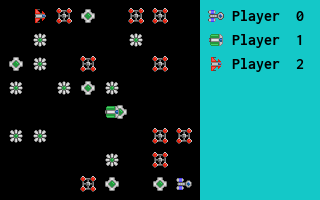

In [11]:
# Environment with skyscrapers but without discharge
env = LidarCompassQTable(DeliveryDrones())
env.env_params.update({'n_drones': 3, 'skyscrapers_factor': 3, 'stations_factor': 0, 'discharge': 0})
states = env.reset()

print('Observation space:', env.observation_space)
print('Sample state:', {drone_index: env.format_state(state) for drone_index, state in states.items()})
Image.fromarray(env.render(mode='rgb_array'))

In [12]:
# Create the agents
agents = {drone.index: RandomAgent(env) for drone in env.drones}
agents[0] = QLearningAgent(
    env,
    gamma=0.95, # Discount factor
    alpha=0.1, # Learning rate
    # Exploration rate
    epsilon_start=1, epsilon_decay=0.99, epsilon_end=0.01
)
agents

{0: <agents.qlearning.QLearningAgent at 0x7fdb818eccf8>,
 1: <agents.random.RandomAgent at 0x7fdb818ec550>,
 2: <agents.random.RandomAgent at 0x7fdb818ecac8>}

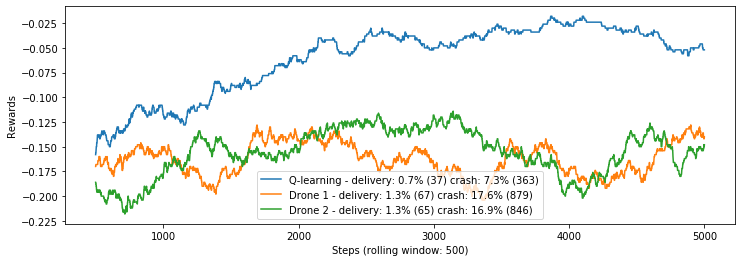

In [13]:
# Train agents
trainer = MultiAgentTrainer(env, agents, reset_agents=True, seed=0)
trainer.train(5000)
plot_rolling_rewards(trainer.rewards_log, drones_labels={0: 'Q-learning'})

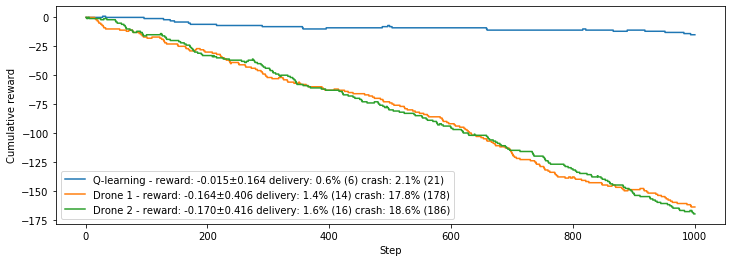

In [14]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=0)
plot_cumulative_rewards(rewards_log, drones_labels={0: 'Q-learning'})

In [15]:
path = os.path.join('output', 'videos', 'ql-compass-lidar-1st-try.mp4')
render_video(env, agents, video_path=path, n_steps=120, fps=1, seed=0)
ColabVideo(path)


[MoviePy] >>>> Building video output/videos/ql-compass-lidar-1st-try.mp4
[MoviePy] Writing video output/videos/ql-compass-lidar-1st-try.mp4


100%|█████████▉| 2880/2881 [00:05<00:00, 493.77it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: output/videos/ql-compass-lidar-1st-try.mp4 



Issues with Q-learning
---

Two issues here

* Sparse reward: pickup rate is around 1%
* No generalization: need to explore entire space!

In [16]:
q_table = agents[0].get_qtable()
print('Q-table:', q_table.shape)
q_table

Q-table: (485, 5)


,←,↓,→,↑,X
"target: ↑, lidar: ←",0.67,0.75,0.76,0.083,0.4
"target: ↓, lidar: ↘, →, ↗, ↑, ↖",0.31,0.13,-0.05,0.17,0.26
"target: ↓, lidar: ↓, ↘, →, ↗, ↑",0.46,0.68,0.53,0.28,0.38
"target: →, lidar: ←, ↓, ↗, ↑",0.17,0.31,0.25,0.11,0.81
"target: ↑, lidar: ↙, ↓, ↘",0.64,0.24,0.65,0.68,0.65
...,...,...,...,...,...
"target: ↘, lidar: ↓, ↗",0.58,0.43,0.2,0.97,0.21
"target: ↖, lidar: ↘, →, ↑",0.7,0.53,0.54,0.57,0.15
"target: ↙, lidar: ←, ↘, →, ↗, ↑, ↖",0.41,0.84,0.096,0.74,0.37
"target: ↙, lidar: ←, ↓, ↘, →, ↗",0.83,0.44,0.32,0.23,0.35


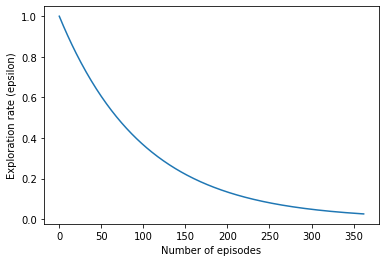

In [17]:
plt.plot(agents[0].epsilons)
plt.xlabel('Number of episodes')
plt.ylabel('Exploration rate (epsilon)')
plt.show()

Possible solutions
---

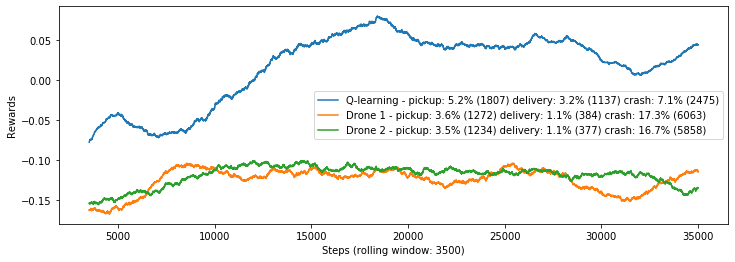

In [18]:
from helpers.rl_helpers import set_seed

# (1/2) Sparse rewards: Create an intermediate "pickup" reward to help
env.env_params.update({
    'n_drones': 3, 'pickup_reward': 0.99, 'delivery_reward': 1.0,
    'skyscrapers_factor': 3, 'stations_factor': 0, 'discharge': 0})
states = env.reset()

# (2/2) Train longer...
agents[0].epsilon = 1.0
agents[0].epsilon_decay = 0.999

set_seed(env, seed=0) # Make things deterministic
trainer.train(30000)

plot_rolling_rewards(
    trainer.rewards_log,
    events={'pickup': [0.99], 'delivery': [1], 'crash': [-1]},
    drones_labels={0: 'Q-learning'})

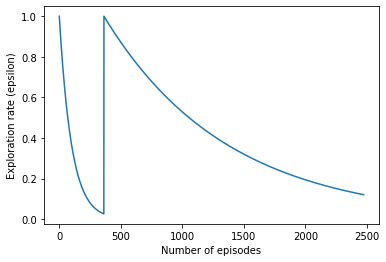

In [19]:
plt.plot(agents[0].epsilons)
plt.xlabel('Number of episodes')
plt.ylabel('Exploration rate (epsilon)')
plt.show()

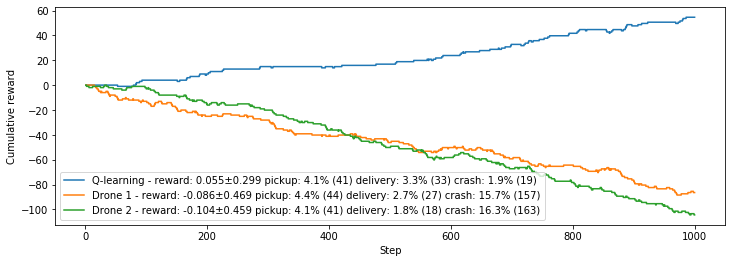

In [20]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=0)
plot_cumulative_rewards(
    rewards_log,
    events={'pickup': [0.99], 'delivery': [1], 'crash': [-1]},
    drones_labels={0: 'Q-learning'}
)

Overfitting issues: try with different seeds
---

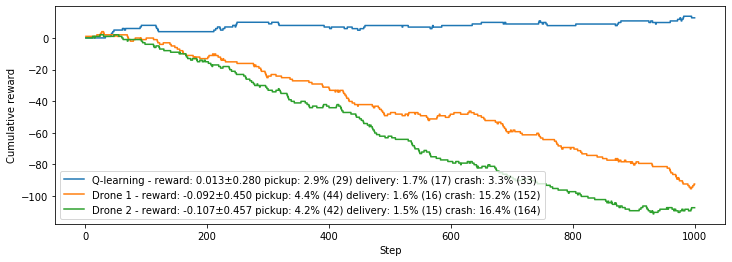

In [21]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=1)
plot_cumulative_rewards(
    rewards_log,
    events={'pickup': [0.99], 'delivery': [1], 'crash': [-1]},
    drones_labels={0: 'Q-learning'}
)

The agent only learned to act in a specific environment!

Q-learning limitations: discrete Q-table!
---

Let's try Q-learning with the full environment: skyscrapers + charge

Observation space: Dict(target_dir:Discrete(8), station_dir:Discrete(9), charge_level:Discrete(4), lidar:MultiBinary(8))
Sample state: target: ↘, lidar: ←, station: X, charge: 3


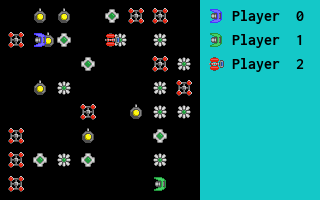

In [22]:
env = LidarCompassChargeQTable(DeliveryDrones())
env.env_params.update({
    'n_drones': 3, 'pickup_reward': 0.99, 'delivery_reward': 1,
    'discharge': 10, 'charge': 20, 'charge_reward': -0.1
})
states = env.reset()

print('Observation space:', env.observation_space)
print('Sample state:', env.format_state(states[0]))
Image.fromarray(env.render(mode='rgb_array'))

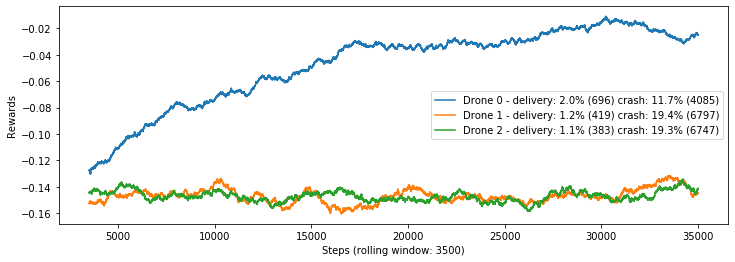

In [23]:
# Create the agents
agents = {drone.index: RandomAgent(env) for drone in env.drones}
agents[0] = QLearningAgent(
    env, gamma=0.95, alpha=0.1,
    epsilon_start=1, epsilon_decay=0.999, epsilon_end=0.01
)

trainer = MultiAgentTrainer(env, agents, reset_agents=True, seed=0)
trainer.train(35000)
plot_rolling_rewards(trainer.rewards_log)

In [24]:
q_table = agents[0].get_qtable()
print('Q-table:', q_table.shape)
q_table.sample(10)

Q-table: (4722, 5)


,←,↓,→,↑,X
"target: →, lidar: ↘, ↗, station: ←, charge: 1",0.48,0.091,0.49,0.73,0.45
"target: →, lidar: ↖, station: ↑, charge: 0",0.56,0.65,0.084,0.72,0.074
"target: ↓, lidar: →, ↖, station: ←, charge: 2",0.18,0.49,0.17,0.61,0.19
"target: ↘, lidar: ↓, ↗, ↑, ↖, station: ←, charge: 3",0.11,0.066,0.4,0.33,0.68
"target: ↘, lidar: , station: ↘, charge: 3",0.77,0.33,0.72,0.91,1
"target: ←, lidar: ↙, ↓, ↘, ↗, station: ↖, charge: 2",0.29,0.1,0.53,0.15,0.23
"target: ↗, lidar: ↙, ↘, →, ↑, station: ↑, charge: 3",0.53,0.83,0.7,0.6,0.11
"target: →, lidar: ↘, ↑, station: ↙, charge: 1",0.53,0.36,0.14,0.78,0.25
"target: ↘, lidar: ↙, ↘, station: ←, charge: 2",0.73,0.042,0.73,0.26,0.55
"target: ←, lidar: , station: ↑, charge: 3",0.41,0.52,0.88,0.31,0.5


Don't forget to test with different seeds

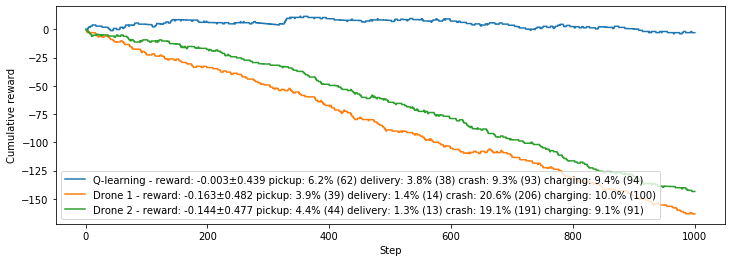

In [39]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=0)
plot_cumulative_rewards(
    rewards_log,
    events={'pickup': [0.99], 'delivery': [1], 'crash': [-1], 'charging': [-0.1]},
    drones_labels={0: 'Q-learning'}
)

Note that for now, we are only training our agent in a single environment: the charging points, skyscrapers etc are always at the same position.

But during evaluation, the environment won't be the same!

Resetting the environment every X steps would help, but won't solve the important limitations with Q-learning.

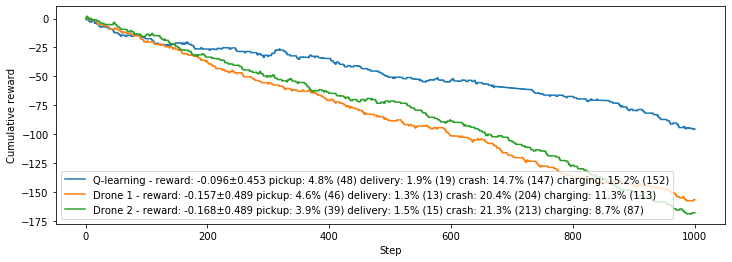

In [41]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=1)
plot_cumulative_rewards(
    rewards_log,
    events={'pickup': [0.99], 'delivery': [1], 'crash': [-1], 'charging': [-0.1]},
    drones_labels={0: 'Q-learning'}
)

In [42]:
from agents.dqn import DQNAgent, DenseQNetworkFactory

# Create environment
env = LidarCompassChargeQTable(DeliveryDrones())
env.env_params.update({
    'n_drones': 3, 'pickup_reward': 0.99, 'delivery_reward': 1
})
states = env.reset()

# Create the agents
agents = {drone.index: RandomAgent(env) for drone in env.drones}
agents[0] = DQNAgent(
    env, DenseQNetworkFactory(env, hidden_layers=[256, 256]),
    gamma=0.95, epsilon_start=1, epsilon_decay=0.999, epsilon_end=0.01,
    memory_size=10000, batch_size=64, target_update_interval=5
)
trainer = MultiAgentTrainer(env, agents, reset_agents=True, seed=0)
agents[0].qnetwork

DenseQNetwork(
  (network): Sequential(
    (dense_1): Linear(in_features=29, out_features=256, bias=True)
    (dense_act_1): ReLU()
    (dense_2): Linear(in_features=256, out_features=256, bias=True)
    (dense_act_2): ReLU()
    (dense_3): Linear(in_features=256, out_features=5, bias=True)
  )
)

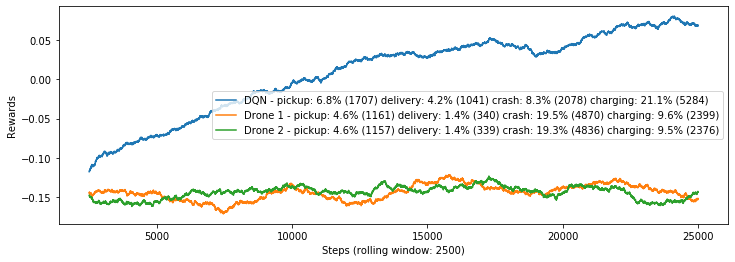

In [43]:
# Train the agents
trainer.train(25000)
plot_rolling_rewards(
    trainer.rewards_log, drones_labels={0: 'DQN'},
    events={'pickup': [0.99], 'delivery': [1], 'crash': [-1], 'charging': [-0.1]})

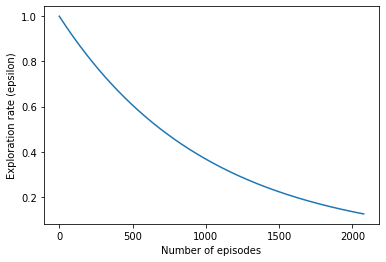

In [44]:
plt.plot(agents[0].epsilons)
plt.xlabel('Number of episodes')
plt.ylabel('Exploration rate (epsilon)')
plt.show()

Try with different seeds

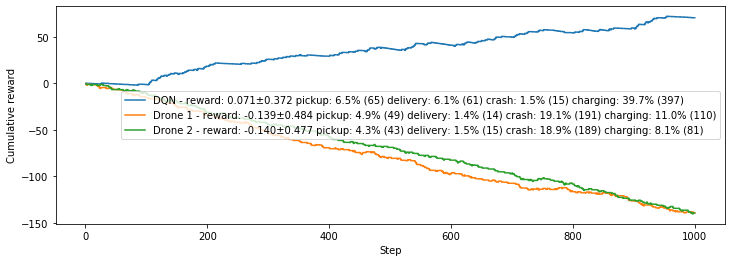

In [56]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=0)
plot_cumulative_rewards(
    rewards_log, drones_labels={0: 'DQN'},
    events={'pickup': [0.99], 'delivery': [1], 'crash': [-1], 'charging': [-0.1]})

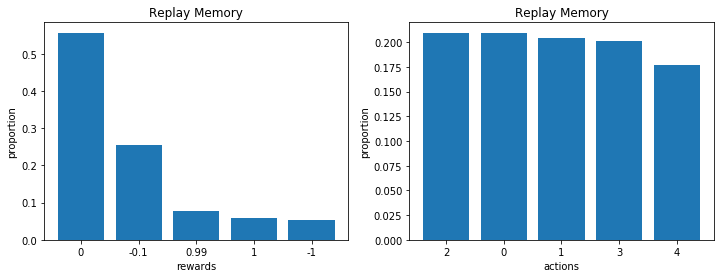

Top state:
 1) Count: 74 state: {'target_dir': 6, 'station_dir': 2, 'charge_level': 2, 'lidar': array([0., 0., 0..
 2) Count: 72 state: {'target_dir': 2, 'station_dir': 8, 'charge_level': 3, 'lidar': array([0., 0., 0..
 3) Count: 70 state: {'target_dir': 6, 'station_dir': 8, 'charge_level': 3, 'lidar': array([0., 0., 0..
 4) Count: 61 state: {'target_dir': 2, 'station_dir': 8, 'charge_level': 3, 'lidar': array([0., 0., 0..
 5) Count: 57 state: {'target_dir': 5, 'station_dir': 8, 'charge_level': 3, 'lidar': array([0., 0., 0..
 6) Count: 52 state: {'target_dir': 4, 'station_dir': 8, 'charge_level': 3, 'lidar': array([1., 0., 0..
 7) Count: 51 state: {'target_dir': 6, 'station_dir': 8, 'charge_level': 3, 'lidar': array([0., 0., 0..
 8) Count: 48 state: {'target_dir': 5, 'station_dir': 8, 'charge_level': 3, 'lidar': array([0., 0., 0..
 9) Count: 48 state: {'target_dir': 4, 'station_dir': 8, 'charge_level': 3, 'lidar': array([1., 1., 1..
10) Count: 45 state: {'target_dir': 2, 'station_dir':

In [57]:
# Inspect replay memory buffer
agents[0].inspect_memory(top_n=10, max_col=80)

Take a moment to play with the different parameters: `memory_size`, `batch_size`, `target_update_interval`

In [58]:
path = os.path.join('output', 'videos', 'dqn-compass-lidar-charge.mp4')
render_video(env, agents, video_path=path, n_steps=120, fps=1, seed=0)
ColabVideo(path)


[MoviePy] >>>> Building video output/videos/dqn-compass-lidar-charge.mp4
[MoviePy] Writing video output/videos/dqn-compass-lidar-charge.mp4


100%|█████████▉| 2880/2881 [00:05<00:00, 494.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output/videos/dqn-compass-lidar-charge.mp4 



DQN and WindowedGrid
---

In [59]:
from env.wrappers import WindowedGridView
from agents.dqn import ConvQNetworkFactory

# Create environment
env = WindowedGridView(DeliveryDrones(), radius=3)
env.env_params.update({
    'n_drones': 3, 'pickup_reward': 0.99, 'delivery_reward': 1
})
states = env.reset()

# Create the agents
agents = {drone.index: RandomAgent(env) for drone in env.drones}
agents[0] = my_agent = DQNAgent(
    env, ConvQNetworkFactory(env, conv_layers=[
        {'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1},
        {'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1},
        {'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1},
        {'out_channels': 64, 'kernel_size': 3, 'stride': 1, 'padding': 1},
        {'out_channels': 64, 'kernel_size': 3, 'stride': 1, 'padding': 1},
        {'out_channels': 64, 'kernel_size': 3, 'stride': 1, 'padding': 1},
        {'out_channels': 64, 'kernel_size': 3, 'stride': 1, 'padding': 1},
    ], dense_layers=[1024, 256]),
    gamma=0.95, epsilon_start=1, epsilon_decay=0.99, epsilon_end=0.01,
    memory_size=10000, batch_size=64, target_update_interval=5
)
trainer = MultiAgentTrainer(env, agents, reset_agents=True, seed=0)
agents[0].qnetwork

ConvQNetwork(
  (network): Sequential(
    (conv2d_1): Conv2d(6, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2d_act_1): ReLU()
    (conv2d_2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2d_act_2): ReLU()
    (conv2d_3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2d_act_3): ReLU()
    (conv2d_4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2d_act_4): ReLU()
    (conv2d_5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2d_act_5): ReLU()
    (conv2d_6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2d_act_6): ReLU()
    (conv2d_7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2d_act_7): ReLU()
    (flatten): Flatten()
    (dense_1): Linear(in_features=3136, out_features=1024, bias=True)
    (dense_act_1): ReLU()
    (dense_2): Linear(in_features=1024, out_features=256, bias=True)
    (dens

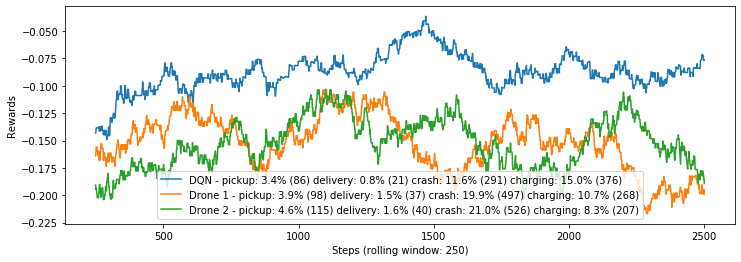

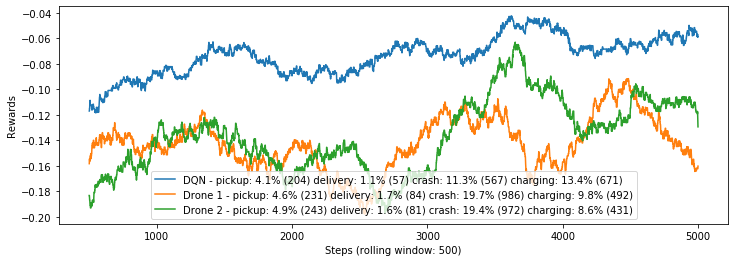

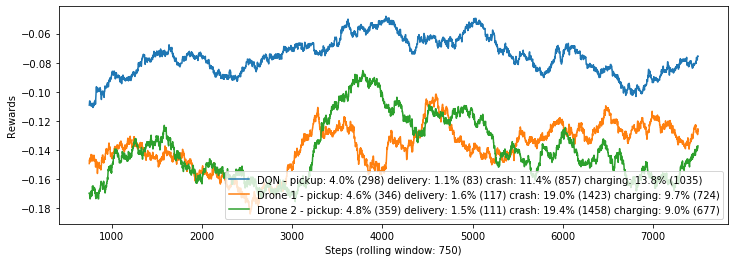

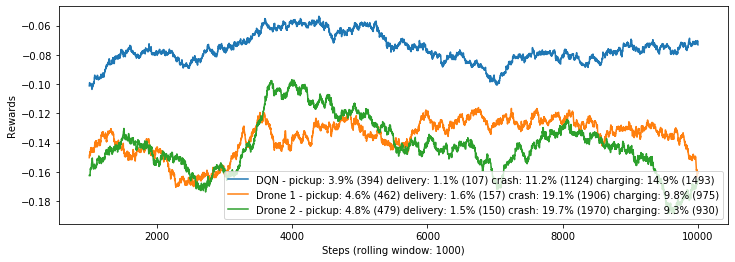

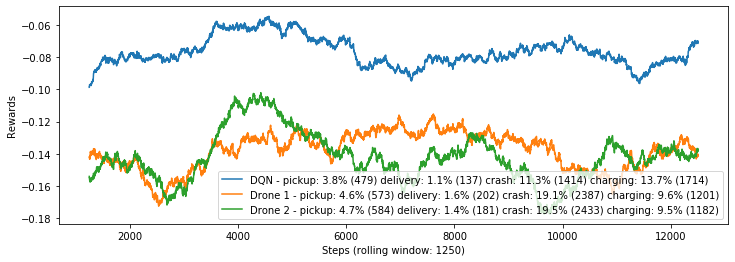

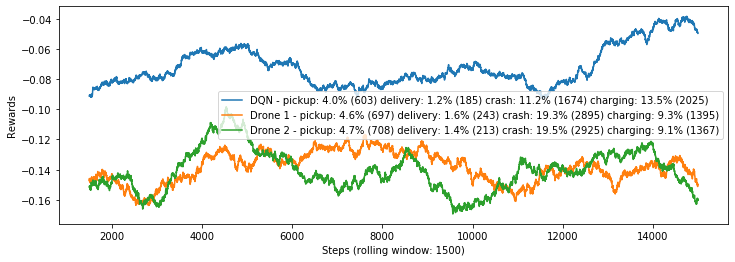

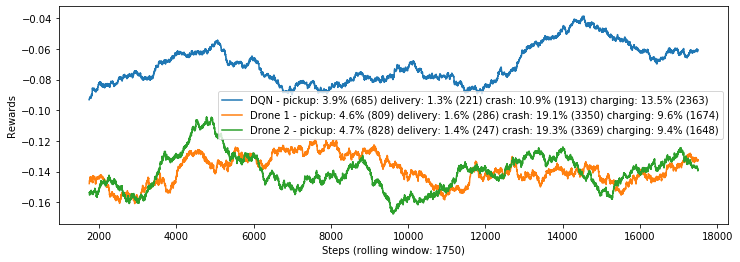

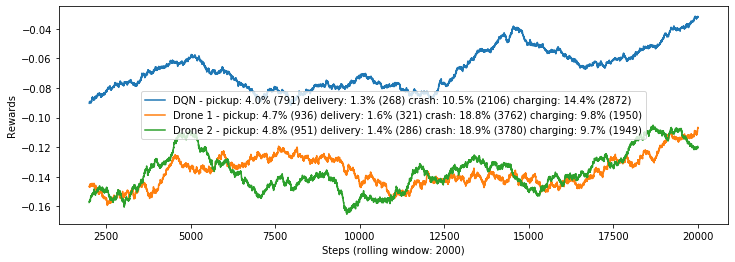

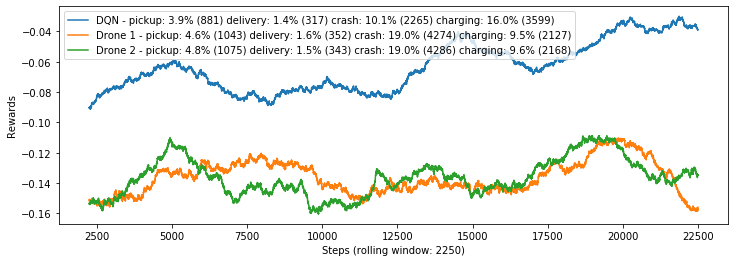

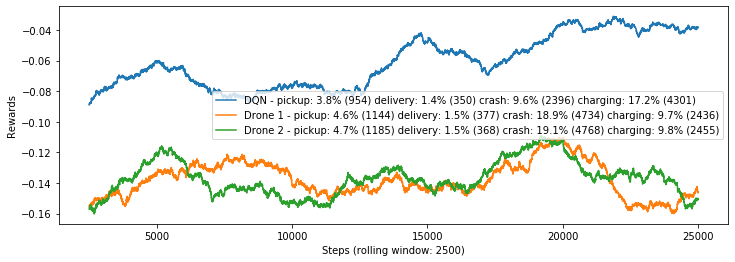

In [60]:
# Train the agents
for run in range(10):
  trainer.train(2500)
  plot_rolling_rewards(
      trainer.rewards_log, drones_labels={0: 'DQN'},
      events={'pickup': [0.99], 'delivery': [1], 'crash': [-1], 'charging': [-0.1]})

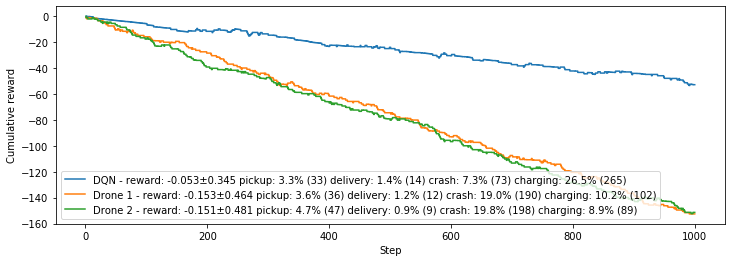

Final scores:
Agent 0: -52.830000000000005
Agent 1: -152.56
Agent 2: -151.37


In [61]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=0)
plot_cumulative_rewards(
    rewards_log, drones_labels={0: 'DQN'},
    events={'pickup': [0.99], 'delivery': [1], 'crash': [-1], 'charging': [-0.1]})

# Print final evaluation scores
print('Final scores:')
for idx, score in enumerate(np.sum(list(rewards_log.values()), axis=1)):
    print("Agent {}: {}".format(idx, score))

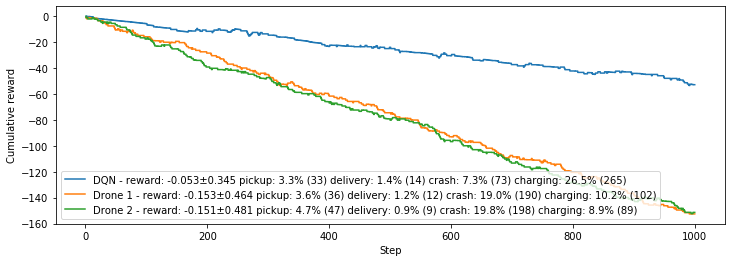

Final scores:
Agent 0: -52.830000000000005
Agent 1: -152.56
Agent 2: -151.37


In [62]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=0)
plot_cumulative_rewards(
    rewards_log, drones_labels={0: 'DQN'},
    events={'pickup': [0.99], 'delivery': [1], 'crash': [-1], 'charging': [-0.1]})

# Print final evaluation scores
print('Final scores:')
for idx, score in enumerate(np.sum(list(rewards_log.values()), axis=1)):
    print("Agent {}: {}".format(idx, score))

In [63]:
path = os.path.join('output', 'videos', 'dqn-windowed.mp4')
render_video(env, agents, video_path=path, n_steps=120, fps=1, seed=0)
ColabVideo(path)


[MoviePy] >>>> Building video output/videos/dqn-windowed.mp4
[MoviePy] Writing video output/videos/dqn-windowed.mp4


100%|█████████▉| 2880/2881 [00:05<00:00, 490.80it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: output/videos/dqn-windowed.mp4 



In [0]:
path = os.path.join('output', 'agents', 'dqn-agent.pt')
agents[0].save(path)
# agents[0].load(path) # Later, load the qnetwork!